<a href="https://colab.research.google.com/github/khushimitr/Building_Innovations_Asg1/blob/main/Building_Innovation_asg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp /content/drive/MyDrive/DATASET.xlsx /content

In [19]:
df = pd.read_excel("/content/DATASET.xlsx")

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [20]:
n = len(df)
j = 0
k = 0
for i in range(n):
    tmp = df.iloc[k, 0]
    if(tmp.startswith('Sec')):
        g = str(tmp).split('_')[1]
    else :
        g = int(tmp)
    df.iloc[j, 0] = g
    j += 1
    if(j%10 == 0):
        k += 10
df.columns = df.columns.str.replace('Unnamed: 0', 'Sec')
df.fillna(0,inplace = True)
df["Sec"] = df["Sec"].astype(int)

In [21]:
df.head()

,Sec,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,1,1,324.0,354.5,17.0,0.0,3.0,117.0,2600.0,400.0,0.0,0.0,0.0,0.0,1.52
1,1,2,324.0,161.1,18.2,0.0,4.0,106.0,5950.0,1190.0,0.0,3.4,0.0,0.0,1.62
2,1,3,324.0,170.7,18.5,0.0,4.0,110.0,5950.0,1190.0,0.0,21.3,0.0,4.0,1.68
3,1,4,324.0,223.9,18.9,0.0,3.0,110.0,6150.0,1340.0,0.0,21.3,0.0,5.0,1.78
4,1,5,324.0,228.2,18.4,0.0,2.0,113.0,6340.0,1450.0,0.0,23.9,0.0,7.0,1.80


## MODELLING

In [22]:
cols = ['Para_9', 'Para_10', 'Para_11', 'Para_12', 'Para_13']
res_dict = {'Para_9': [], 'Para_10': [], 'Para_11': [], 'Para_12': [], 'Para_13': []}

In [23]:
model = GradientBoostingRegressor()
rf = RandomForestRegressor(n_estimators = 120, random_state = 42)

In [24]:
lst = [10,11,12,13,14]
def select_model(val):
    rmse = []
    index = 0
    if(val==0):
        for j in lst:
            res = 0
            count = 0
            for i in range(0, n, 10):
                X_train = df.iloc[i:i+9, 1:10]
                Y_train = df.iloc[i:i+9, j]
                X_test = df.iloc[i+9, 1:10].to_numpy()
                Y_test = df.iloc[i+9, j]
                model.fit(x_train.values, y_train.values)

                Y_pred = model.predict(X_test.reshape(1,-1))[0]

                res_dict[cols[index]].append(Y_pred)
                res += (Y_test - Y_pred)**2
                count += 1
            rmse.append(res)
            index += 1
    else:
        for j in lst:
            res = 0
            count = 0
            for i in range(0, n, 10):
                x_train = df.iloc[i:i+9, 1:10]
                y_train = df.iloc[i:i+9, j]
                x_test = df.iloc[i+9, 1:10].to_numpy()
                y_test = df.iloc[i+9, j]

                rf.fit(x_train.values, y_train.values)
                y_pred = rf.predict(x_test.reshape(1,-1))[0]
                res_dict[cols[index]].append(y_pred)
                res += (y_test - y_pred)**2
                count += 1
            rmse.append(res)
            index += 1
    return (rmse, count)

In [25]:
rmse, count = select_model(1)

## Calculations:

In [26]:
print(rmse)

[472838.4846816743, 420296.62745216105, 70186.34430555555, 22203.631998456785, 5.118089929966753]


In [27]:
for i in rmse:
    print((i/count)**0.5)

68.42199321317746
64.50854786035026
26.361227210716223
14.82693294578417
0.2251092128777565


In [28]:
print((sum(rmse)/500)**0.5)

44.39662614496236


## Plots

In [29]:
import random
test_df = df.loc[df['year'] == 10]
pred_df = pd.DataFrame.from_dict(res_dict)

ind = []
ind.append(random.randint(0,100))

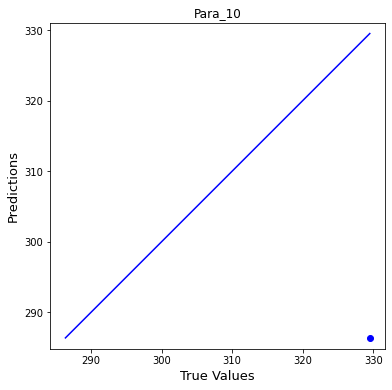

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
true_value = test_df.iloc[ind, 1+10]
predicted_value = pred_df.iloc[ind, 1]
plt.scatter(true_value, predicted_value, c='blue')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title(cols[1])
plt.xlabel('True Values', fontsize=13)
plt.ylabel('Predictions', fontsize=13)
plt.axis('equal')
plt.show()